# TEAM NAME : **AKROS**
# TEAM NO : **SAV24**
# PROBLEM STATEMENT : **Climate Action: Reducing Carbon Footprint with Data**

In [3]:
!pip install eco2ai

  Using cached eco2ai-0.3.9-py2.py3-none-any.whl.metadata (9.7 kB)
  Using cached APScheduler-3.10.4-py3-none-any.whl.metadata (5.7 kB)
  Using cached pandas-1.4.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached pynvml-11.5.3-py3-none-any.whl.metadata (8.8 kB)
Using cached eco2ai-0.3.9-py2.py3-none-any.whl (107 kB)
Using cached pandas-1.4.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
Using cached APScheduler-3.10.4-py3-none-any.whl (59 kB)
Using cached pynvml-11.5.3-py3-none-any.whl (53 kB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.19.0 requires pandas>=1.5.0, but you have pandas 1.4.3 which is incompatible.
bigframes 1.22.0 requir

In [4]:
import eco2ai
from eco2ai import track

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from PIL import Image
import os

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


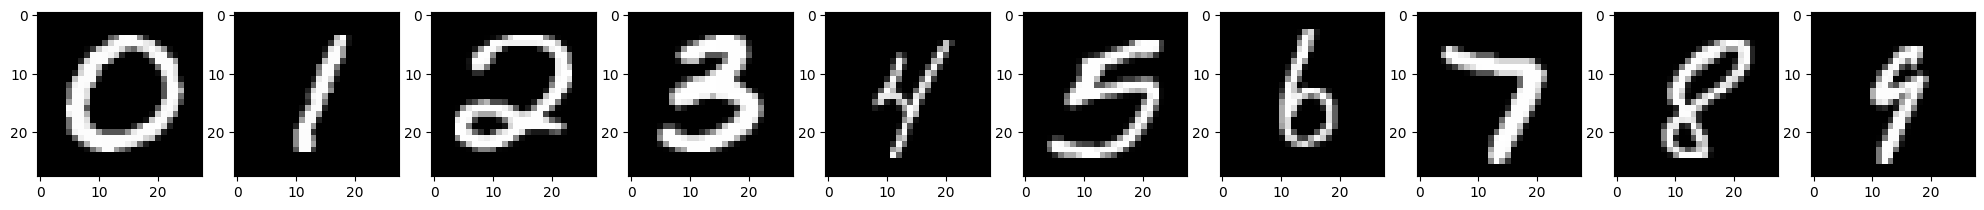

In [7]:
#
(x_train, y_train), (x_test, y_test) = mnist.load_data()

fig, axs = plt.subplots(1, 10, figsize=(25, 3))
for i in range(10):
    label_indexes = np.where(y_train==i)[0]
    index = random.choice(label_indexes)
    img = x_train[index]
    axs[i].imshow(Image.fromarray(img), cmap='gray')

plt.show()

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [8]:
def create_model():
    model = Sequential()
    model.add(BatchNormalization(input_shape=(28, 28, 1)))
    model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    return model

def train_model(
    model,
    epochs=5,
    batch_size=256,
    ):

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test),verbose=1)

    plt.plot(history.history['accuracy'],
            label='train accuracy')
    plt.plot(history.history['val_accuracy'],
            label='val accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

/usr/local/lib/python3.10/dist-packages/eco2ai/emission_track.py:135: UserWarning: 
If you use a VPN, you may have problems with identifying your country by IP.
It is recommended to disable VPN or
manually install the ISO-Alpha-2 code of your country during initialization of the Tracker() class.
You can find the ISO-Alpha-2 code of your country here: https://www.iban.com/country-codes

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.7179 - loss: 0.8748 - val_accuracy: 0.9684 - val_loss: 0.0962
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9443 - loss: 0.1857 - val_accuracy: 0.9800 - val_loss: 0.0601
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9588 - loss: 0.1352 - val_accuracy: 0.9833 - val_loss: 0.0543
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9668 - loss: 0.1085 - val_accuracy: 0.9849 - val_loss: 0.0454
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9718 - loss: 0.0917 - val_accuracy: 0.9862 - val_loss: 0.0447


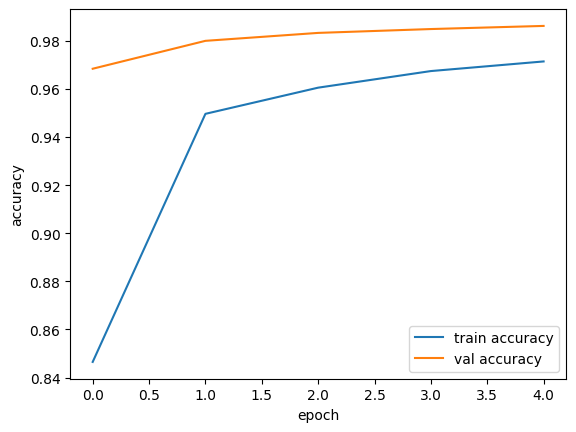

In [9]:

tracker = eco2ai.Tracker(
    project_name="mnist for ESG",
    experiment_description="Convolutional model test1",
    )

tracker.start()

model = create_model()
train_model(model, epochs=5, batch_size=256)


tracker.stop()

In [10]:
#checking results
df = pd.read_csv('emission.csv')
df

,id,project_name,experiment_description,epoch,start_time,duration(s),power_consumption(kWh),CO2_emissions(kg),CPU_name,GPU_name,OS,region/country,cost
0,c73bd983-2e63-407b-a71a-3c5f2f52874d,mnist for ESG,Convolutional model test1,NaN,2024-10-19 13:52:40,24.501196,0.001,0.000335,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,US/Nevada,0


In [11]:
# Tracker parameters description:
help(eco2ai.Tracker)

Help on class Tracker in module eco2ai.emission_track:

class Tracker(builtins.object)
 |  Tracker(project_name=None, experiment_description=None, file_name=None, measure_period=10, emission_level=None, alpha_2_code=None, region=None, cpu_processes='current', pue=1, encode_file=None, electricity_pricing=None, ignore_warnings=False)
 |  
 |  This class calculates CO2 emissions during CPU or GPU calculations 
 |  In order to calculate CPU & GPU power consumption correctly you should create the 'Tracker' before any CPU or GPU usage
 |  It is recommended to create a new “Tracker” object per every new calculation.
 |  
 |  Example
 |  ----------
 |  import eco2ai.Tracker
 |  tracker = eco2ai.Tracker()
 |  
 |  tracker.start()
 |  
 |  *your CPU and GPU calculations*
 |  
 |  tracker.stop()
 |  
 |  Methods defined here:
 |  
 |  __init__(self, project_name=None, experiment_description=None, file_name=None, measure_period=10, emission_level=None, alpha_2_code=None, region=None, cpu_processes

/usr/local/lib/python3.10/dist-packages/eco2ai/emission_track.py:135: UserWarning: 
If you use a VPN, you may have problems with identifying your country by IP.
It is recommended to disable VPN or
manually install the ISO-Alpha-2 code of your country during initialization of the Tracker() class.
You can find the ISO-Alpha-2 code of your country here: https://www.iban.com/country-codes

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7451 - loss: 0.7876 - val_accuracy: 0.9735 - val_loss: 0.0843
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9543 - loss: 0.1544 - val_accuracy: 0.9797 - val_loss: 0.0618
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9653 - loss: 0.1148 - val_accuracy: 0.9834 - val_loss: 0.0490
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9734 - loss: 0.0896 - val_accuracy: 0.9846 - val_loss: 0.0440
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9750 - loss: 0.0802 - val_accuracy: 0.9867 - val_loss: 0.0397


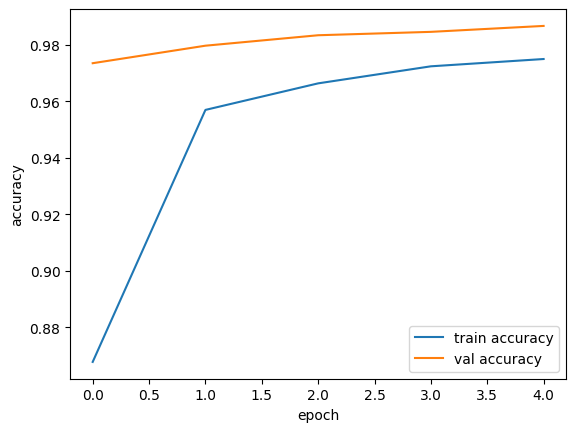

In [12]:


#Creating the Tracker object
tracker = eco2ai.Tracker(
    project_name="mnist for ESG",
    experiment_description="Convolutional model test2. ",
    file_name="emission.csv",
    measure_period=5,
    # tracker will automatically define emission_level
    emission_level=None,
    alpha_2_code="CA", #Canada
    region="Ontario",
    pue=1.4,
    # encoded results will be saved to file "encoded_" + file_name.
    encode_file=True,
    electricity_pricing={
        "6:00-14:30": 150,
        "14:30-22:00": 200,
        "22:00-6:00": 100
    },
    )
#start tracking
tracker.start()

model = create_model()
train_model(model, epochs=5, batch_size=256)

#end tracking
tracker.stop()

In [13]:
df = pd.read_csv('emission.csv')
df

,id,project_name,experiment_description,epoch,start_time,duration(s),power_consumption(kWh),CO2_emissions(kg),CPU_name,GPU_name,OS,region/country,cost
0,c73bd983-2e63-407b-a71a-3c5f2f52874d,mnist for ESG,Convolutional model test1,NaN,2024-10-19 13:52:40,24.501196,0.001000,0.000335,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,US/Nevada,0.000000
1,1b46ba34-ff35-455b-9146-822934621783,mnist for ESG,Convolutional model test2.,NaN,2024-10-19 13:53:06,21.770095,0.001257,0.000038,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,CA/Ontario,0.188563


/usr/local/lib/python3.10/dist-packages/eco2ai/emission_track.py:135: UserWarning: 
If you use a VPN, you may have problems with identifying your country by IP.
It is recommended to disable VPN or
manually install the ISO-Alpha-2 code of your country during initialization of the Tracker() class.
You can find the ISO-Alpha-2 code of your country here: https://www.iban.com/country-codes

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/eco2ai/emission_track.py:135: UserWarning: 
If you use a VPN, you may have problems with identifying your country by IP.
It is recommended to disable VPN or
manually install the ISO-Alpha-2 code of your country during initialization of the Tracker() class.
You can find the ISO-Alpha-2 code of your country here: https://www.iban.com/country-codes

  warnings.warn(


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8557 - loss: 0.5066 - val_accuracy: 0.9634 - val_loss: 0.1278
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9706 - loss: 0.1062 - val_accuracy: 0.9724 - val_loss: 0.0867
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9807 - loss: 0.0690 - val_accuracy: 0.9783 - val_loss: 0.0685
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9854 - loss: 0.0493 - val_accuracy: 0.9756 - val_loss: 0.0772
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9877 - loss: 0.0423 - val_accuracy: 0.9799 - val_loss: 0.0652


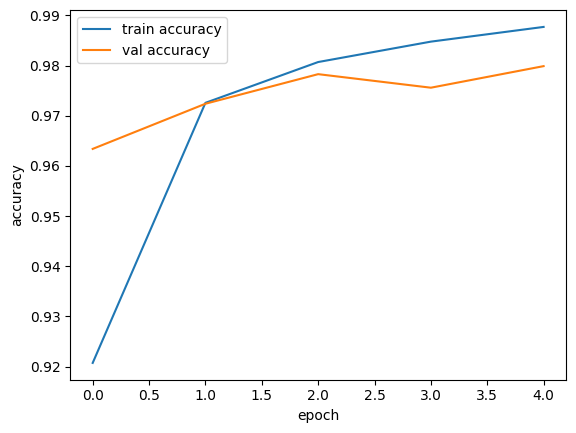

In [14]:
#Creating tracker object
tracker = eco2ai.Tracker(
    project_name="Mnist, testing decorators",
    experiment_description="simple model",
    file_name="emission.csv"
    )

#using decorators
@track
def train_func():
    batch_size = 256

    model = Sequential()
    model.add(BatchNormalization(input_shape=(28, 28, 1)))
    model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test),verbose=1)

    plt.plot(history.history['accuracy'],
            label='train accuracy')
    plt.plot(history.history['val_accuracy'],
            label='val accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()


train_func()

In [15]:
#checking results
df = pd.read_csv('emission.csv')
df

,id,project_name,experiment_description,epoch,start_time,duration(s),power_consumption(kWh),CO2_emissions(kg),CPU_name,GPU_name,OS,region/country,cost
0,c73bd983-2e63-407b-a71a-3c5f2f52874d,mnist for ESG,Convolutional model test1,NaN,2024-10-19 13:52:40,24.501196,0.001000,0.000335,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,US/Nevada,0.000000
1,1b46ba34-ff35-455b-9146-822934621783,mnist for ESG,Convolutional model test2.,NaN,2024-10-19 13:53:06,21.770095,0.001257,0.000038,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,CA/Ontario,0.188563
2,5846b188-b915-4a13-b41f-3d38fe8a9a95,"Mnist, testing decorators",simple model,NaN,2024-10-19 13:53:29,9.680352,0.000093,0.000031,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,US/Nevada,0.000000


In [16]:
epochs = 5

tracker = eco2ai.Tracker(
    project_name="mnist for ESG",
    experiment_description="ML tracking",
    file_name="emission.csv",
    # tracker will automatically define emission_level
    emission_level=None,
    alpha_2_code="AU", #Australia
    region="Queensland",
    )
tracker.start_training()

model = create_model()

for epoch in range(epochs):

    history = model.fit(x_train, y_train, batch_size=256, epochs=1, validation_data=(x_test, y_test),verbose=1)
    # type(history.history) == dict
    # print(history.history)
    parameters_to_save = {item[0]: item[1][0] for item in history.history.items()}
    # telling to the tracker to start new epoch tracking and so save model parameters
    tracker.new_epoch(parameters_to_save)

tracker.stop_training()


/usr/local/lib/python3.10/dist-packages/eco2ai/emission_track.py:135: UserWarning: 
If you use a VPN, you may have problems with identifying your country by IP.
It is recommended to disable VPN or
manually install the ISO-Alpha-2 code of your country during initialization of the Tracker() class.
You can find the ISO-Alpha-2 code of your country here: https://www.iban.com/country-codes

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7137 - loss: 0.8810 - val_accuracy: 0.9684 - val_loss: 0.1079
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9444 - loss: 0.1872 - val_accuracy: 0.9793 - val_loss: 0.0639
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9609 - loss: 0.1288 - val_accuracy: 0.9821 - val_loss: 0.0546
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9667 - loss: 0.1095 - val_accuracy: 0.9845 - val_loss: 0.0475
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9712 - loss: 0.0944 - val_accuracy: 0.9870 - val_loss: 0.0394


In [17]:
#checking results
df = pd.read_csv('emission.csv')
df

,id,project_name,experiment_description,epoch,start_time,duration(s),power_consumption(kWh),CO2_emissions(kg),CPU_name,GPU_name,OS,region/country,cost
0,c73bd983-2e63-407b-a71a-3c5f2f52874d,mnist for ESG,Convolutional model test1,NaN,2024-10-19 13:52:40,24.501196,0.001000,0.000335,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,US/Nevada,0.000000
1,1b46ba34-ff35-455b-9146-822934621783,mnist for ESG,Convolutional model test2.,NaN,2024-10-19 13:53:06,21.770095,0.001257,0.000038,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,CA/Ontario,0.188563
2,5846b188-b915-4a13-b41f-3d38fe8a9a95,"Mnist, testing decorators",simple model,NaN,2024-10-19 13:53:29,9.680352,0.000093,0.000031,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,US/Nevada,0.000000
3,9ffb3be4-e00f-4b8c-90b2-e77ad8f5fad6,mnist for ESG,ML tracking,"epoch: 1, accuracy: 0.8476666808128357, loss: ...",2024-10-19 13:53:40,11.980381,0.000090,0.000072,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,0.000000
4,9ffb3be4-e00f-4b8c-90b2-e77ad8f5fad6,mnist for ESG,ML tracking,"epoch: 2, accuracy: 0.9483833312988281, loss: ...",2024-10-19 13:53:52,1.776542,0.000018,0.000014,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,0.000000
5,9ffb3be4-e00f-4b8c-90b2-e77ad8f5fad6,mnist for ESG,ML tracking,"epoch: 3, accuracy: 0.9616166949272156, loss: ...",2024-10-19 13:53:54,2.871269,0.000028,0.000023,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,0.000000
6,9ffb3be4-e00f-4b8c-90b2-e77ad8f5fad6,mnist for ESG,ML tracking,"epoch: 4, accuracy: 0.9678999781608582, loss: ...",2024-10-19 13:53:57,2.863688,0.000028,0.000023,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,0.000000
7,9ffb3be4-e00f-4b8c-90b2-e77ad8f5fad6,mnist for ESG,ML tracking,"epoch: 5, accuracy: 0.9715166687965393, loss: ...",2024-10-19 13:54:00,2.864508,0.000028,0.000023,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,0.000000


In [18]:
eco2ai.summary('emission.csv')

,project_name,total duration(s),total power_consumption(kWh),total CO2_emissions(kg),total electricity cost
0,"Mnist, testing decorators",9.680352,0.000093,0.000031,0.000000
1,mnist for ESG,68.627678,0.002449,0.000527,0.188563
2,All the projects,78.308030,0.002541,0.000558,0.188563


In [19]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

In [20]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:03<00:00, 42658538.37it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


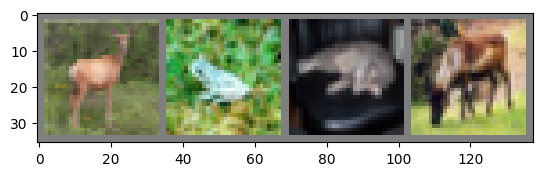

deer  frog  cat   deer 


In [21]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
for images, labels in dataiter:
  break
# images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [22]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [23]:
def train_epoch(
    net,
    optimizer,
    trainloader
    ):
    result_loss = 0
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        result_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    return round(result_loss / len(trainloader), 3)

In [24]:
def get_accuracy(net, testloader):
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct // total

In [25]:
def plot_results(net, testloader):
    dataiter = iter(testloader)
    for images, labels in dataiter:
      break

    # print images
    imshow(torchvision.utils.make_grid(images))
    print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

In [26]:
#Creating the Tracker object
tracker = eco2ai.Tracker(
    project_name="CIFAR10 for ESG",
    experiment_description="Convolutional model test1",
    )
#start tracking
tracker.start()

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
for epoch in range(2):  # loop over the dataset multiple times
    train_epoch(net, optimizer, trainloader)

print('Finished Training')

#end tracking
tracker.stop()

/usr/local/lib/python3.10/dist-packages/eco2ai/emission_track.py:135: UserWarning: 
If you use a VPN, you may have problems with identifying your country by IP.
It is recommended to disable VPN or
manually install the ISO-Alpha-2 code of your country during initialization of the Tracker() class.
You can find the ISO-Alpha-2 code of your country here: https://www.iban.com/country-codes

  warnings.warn(


[1,  2000] loss: 2.239
[1,  4000] loss: 1.932
[1,  6000] loss: 1.709
[1,  8000] loss: 1.599
[1, 10000] loss: 1.512
[1, 12000] loss: 1.459
[2,  2000] loss: 1.388
[2,  4000] loss: 1.342
[2,  6000] loss: 1.343
[2,  8000] loss: 1.326
[2, 10000] loss: 1.280
[2, 12000] loss: 1.276
Finished Training


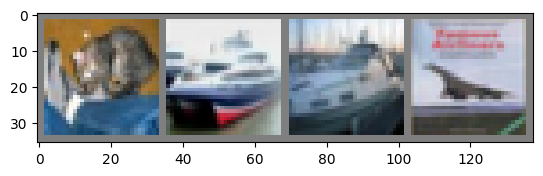

GroundTruth:  cat   ship  ship  plane
Accuracy of the network on the 10000 test images: 53 %


In [27]:
plot_results(net, testloader)

In [28]:
#checking results
df = pd.read_csv('emission.csv')
df

,id,project_name,experiment_description,epoch,start_time,duration(s),power_consumption(kWh),CO2_emissions(kg),CPU_name,GPU_name,OS,region/country,cost
0,c73bd983-2e63-407b-a71a-3c5f2f52874d,mnist for ESG,Convolutional model test1,NaN,2024-10-19 13:52:40,24.501196,0.001000,0.000335,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,US/Nevada,0.000000
1,1b46ba34-ff35-455b-9146-822934621783,mnist for ESG,Convolutional model test2.,NaN,2024-10-19 13:53:06,21.770095,0.001257,0.000038,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,CA/Ontario,0.188563
2,5846b188-b915-4a13-b41f-3d38fe8a9a95,"Mnist, testing decorators",simple model,NaN,2024-10-19 13:53:29,9.680352,0.000093,0.000031,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,US/Nevada,0.000000
3,9ffb3be4-e00f-4b8c-90b2-e77ad8f5fad6,mnist for ESG,ML tracking,"epoch: 1, accuracy: 0.8476666808128357, loss: ...",2024-10-19 13:53:40,11.980381,0.000090,0.000072,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,0.000000
4,9ffb3be4-e00f-4b8c-90b2-e77ad8f5fad6,mnist for ESG,ML tracking,"epoch: 2, accuracy: 0.9483833312988281, loss: ...",2024-10-19 13:53:52,1.776542,0.000018,0.000014,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,0.000000
5,9ffb3be4-e00f-4b8c-90b2-e77ad8f5fad6,mnist for ESG,ML tracking,"epoch: 3, accuracy: 0.9616166949272156, loss: ...",2024-10-19 13:53:54,2.871269,0.000028,0.000023,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,0.000000
6,9ffb3be4-e00f-4b8c-90b2-e77ad8f5fad6,mnist for ESG,ML tracking,"epoch: 4, accuracy: 0.9678999781608582, loss: ...",2024-10-19 13:53:57,2.863688,0.000028,0.000023,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,0.000000
7,9ffb3be4-e00f-4b8c-90b2-e77ad8f5fad6,mnist for ESG,ML tracking,"epoch: 5, accuracy: 0.9715166687965393, loss: ...",2024-10-19 13:54:00,2.864508,0.000028,0.000023,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,0.000000
8,b7e599e7-aa57-4a94-aa52-265b8a6194a2,CIFAR10 for ESG,Convolutional model test1,NaN,2024-10-19 13:54:21,140.181200,0.005518,0.001851,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,US/Nevada,0.000000


In [29]:
# Tracker parameters description:
help(eco2ai.Tracker)

Help on class Tracker in module eco2ai.emission_track:

class Tracker(builtins.object)
 |  Tracker(project_name=None, experiment_description=None, file_name=None, measure_period=10, emission_level=None, alpha_2_code=None, region=None, cpu_processes='current', pue=1, encode_file=None, electricity_pricing=None, ignore_warnings=False)
 |  
 |  This class calculates CO2 emissions during CPU or GPU calculations 
 |  In order to calculate CPU & GPU power consumption correctly you should create the 'Tracker' before any CPU or GPU usage
 |  It is recommended to create a new “Tracker” object per every new calculation.
 |  
 |  Example
 |  ----------
 |  import eco2ai.Tracker
 |  tracker = eco2ai.Tracker()
 |  
 |  tracker.start()
 |  
 |  *your CPU and GPU calculations*
 |  
 |  tracker.stop()
 |  
 |  Methods defined here:
 |  
 |  __init__(self, project_name=None, experiment_description=None, file_name=None, measure_period=10, emission_level=None, alpha_2_code=None, region=None, cpu_processes

In [30]:
#import warnings
#warnings.filterwarnings('ignore')

#Creating the Tracker object
tracker = eco2ai.Tracker(
    project_name="CIFAR10 for ESG",
    experiment_description="Convolutional model test2.",
    file_name="emission.csv",
    measure_period=10,
    # tracker will automatically define emission_level
    emission_level=None,
    alpha_2_code="CA", #Canada
    region="Ontario",
    pue=1.4,
    # encoded results will be saved to file "encoded_" + file_name.
    encode_file=True,
    electricity_pricing={
        "6:00-14:30": 150,
        "14:30-22:00": 200,
        "22:00-6:00": 100
    },
    )
#start tracking
tracker.start()

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
for epoch in range(1):  # loop over the dataset multiple times
    train_epoch(net, optimizer, trainloader)

#end tracking
tracker.stop()

/usr/local/lib/python3.10/dist-packages/eco2ai/emission_track.py:135: UserWarning: 
If you use a VPN, you may have problems with identifying your country by IP.
It is recommended to disable VPN or
manually install the ISO-Alpha-2 code of your country during initialization of the Tracker() class.
You can find the ISO-Alpha-2 code of your country here: https://www.iban.com/country-codes

  warnings.warn(


[1,  2000] loss: 2.225
[1,  4000] loss: 1.872
[1,  6000] loss: 1.713
[1,  8000] loss: 1.573
[1, 10000] loss: 1.524
[1, 12000] loss: 1.497


In [31]:
#checking results
df = pd.read_csv('emission.csv')
df

,id,project_name,experiment_description,epoch,start_time,duration(s),power_consumption(kWh),CO2_emissions(kg),CPU_name,GPU_name,OS,region/country,cost
0,c73bd983-2e63-407b-a71a-3c5f2f52874d,mnist for ESG,Convolutional model test1,NaN,2024-10-19 13:52:40,24.501196,0.001000,0.000335,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,US/Nevada,0.000000
1,1b46ba34-ff35-455b-9146-822934621783,mnist for ESG,Convolutional model test2.,NaN,2024-10-19 13:53:06,21.770095,0.001257,0.000038,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,CA/Ontario,0.188563
2,5846b188-b915-4a13-b41f-3d38fe8a9a95,"Mnist, testing decorators",simple model,NaN,2024-10-19 13:53:29,9.680352,0.000093,0.000031,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,US/Nevada,0.000000
3,9ffb3be4-e00f-4b8c-90b2-e77ad8f5fad6,mnist for ESG,ML tracking,"epoch: 1, accuracy: 0.8476666808128357, loss: ...",2024-10-19 13:53:40,11.980381,0.000090,0.000072,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,0.000000
4,9ffb3be4-e00f-4b8c-90b2-e77ad8f5fad6,mnist for ESG,ML tracking,"epoch: 2, accuracy: 0.9483833312988281, loss: ...",2024-10-19 13:53:52,1.776542,0.000018,0.000014,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,0.000000
5,9ffb3be4-e00f-4b8c-90b2-e77ad8f5fad6,mnist for ESG,ML tracking,"epoch: 3, accuracy: 0.9616166949272156, loss: ...",2024-10-19 13:53:54,2.871269,0.000028,0.000023,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,0.000000
6,9ffb3be4-e00f-4b8c-90b2-e77ad8f5fad6,mnist for ESG,ML tracking,"epoch: 4, accuracy: 0.9678999781608582, loss: ...",2024-10-19 13:53:57,2.863688,0.000028,0.000023,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,0.000000
7,9ffb3be4-e00f-4b8c-90b2-e77ad8f5fad6,mnist for ESG,ML tracking,"epoch: 5, accuracy: 0.9715166687965393, loss: ...",2024-10-19 13:54:00,2.864508,0.000028,0.000023,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,0.000000
8,b7e599e7-aa57-4a94-aa52-265b8a6194a2,CIFAR10 for ESG,Convolutional model test1,NaN,2024-10-19 13:54:21,140.181200,0.005518,0.001851,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,US/Nevada,0.000000
9,dabe7dcc-2445-4854-be83-2c13dcc129da,CIFAR10 for ESG,Convolutional model test2.,NaN,2024-10-19 13:56:51,70.409536,0.003925,0.000118,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,CA/Ontario,0.588697


In [32]:
#Creating tracker object
tracker = eco2ai.Tracker(
    project_name="CIFAR10, testing decorators",
    experiment_description="simple model",
    file_name="emission.csv"
    )

#using decorators
@track
def train_model(
    net,
    optimizer,
    trainloader,
    epochs=1,
    ):
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                running_loss = 0.0

/usr/local/lib/python3.10/dist-packages/eco2ai/emission_track.py:135: UserWarning: 
If you use a VPN, you may have problems with identifying your country by IP.
It is recommended to disable VPN or
manually install the ISO-Alpha-2 code of your country during initialization of the Tracker() class.
You can find the ISO-Alpha-2 code of your country here: https://www.iban.com/country-codes

  warnings.warn(


In [33]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

train_model(
    net,
    optimizer,
    trainloader,
    )

/usr/local/lib/python3.10/dist-packages/eco2ai/emission_track.py:135: UserWarning: 
If you use a VPN, you may have problems with identifying your country by IP.
It is recommended to disable VPN or
manually install the ISO-Alpha-2 code of your country during initialization of the Tracker() class.
You can find the ISO-Alpha-2 code of your country here: https://www.iban.com/country-codes

  warnings.warn(


[1,  2000] loss: 2.170
[1,  4000] loss: 1.838
[1,  6000] loss: 1.632
[1,  8000] loss: 1.549
[1, 10000] loss: 1.511
[1, 12000] loss: 1.460


In [34]:
#checking results
df = pd.read_csv('emission.csv')
df

,id,project_name,experiment_description,epoch,start_time,duration(s),power_consumption(kWh),CO2_emissions(kg),CPU_name,GPU_name,OS,region/country,cost
0,c73bd983-2e63-407b-a71a-3c5f2f52874d,mnist for ESG,Convolutional model test1,NaN,2024-10-19 13:52:40,24.501196,0.001000,0.000335,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,US/Nevada,0.000000
1,1b46ba34-ff35-455b-9146-822934621783,mnist for ESG,Convolutional model test2.,NaN,2024-10-19 13:53:06,21.770095,0.001257,0.000038,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,CA/Ontario,0.188563
2,5846b188-b915-4a13-b41f-3d38fe8a9a95,"Mnist, testing decorators",simple model,NaN,2024-10-19 13:53:29,9.680352,0.000093,0.000031,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,US/Nevada,0.000000
3,9ffb3be4-e00f-4b8c-90b2-e77ad8f5fad6,mnist for ESG,ML tracking,"epoch: 1, accuracy: 0.8476666808128357, loss: ...",2024-10-19 13:53:40,11.980381,0.000090,0.000072,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,0.000000
4,9ffb3be4-e00f-4b8c-90b2-e77ad8f5fad6,mnist for ESG,ML tracking,"epoch: 2, accuracy: 0.9483833312988281, loss: ...",2024-10-19 13:53:52,1.776542,0.000018,0.000014,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,0.000000
5,9ffb3be4-e00f-4b8c-90b2-e77ad8f5fad6,mnist for ESG,ML tracking,"epoch: 3, accuracy: 0.9616166949272156, loss: ...",2024-10-19 13:53:54,2.871269,0.000028,0.000023,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,0.000000
6,9ffb3be4-e00f-4b8c-90b2-e77ad8f5fad6,mnist for ESG,ML tracking,"epoch: 4, accuracy: 0.9678999781608582, loss: ...",2024-10-19 13:53:57,2.863688,0.000028,0.000023,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,0.000000
7,9ffb3be4-e00f-4b8c-90b2-e77ad8f5fad6,mnist for ESG,ML tracking,"epoch: 5, accuracy: 0.9715166687965393, loss: ...",2024-10-19 13:54:00,2.864508,0.000028,0.000023,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,0.000000
8,b7e599e7-aa57-4a94-aa52-265b8a6194a2,CIFAR10 for ESG,Convolutional model test1,NaN,2024-10-19 13:54:21,140.181200,0.005518,0.001851,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,US/Nevada,0.000000
9,dabe7dcc-2445-4854-be83-2c13dcc129da,CIFAR10 for ESG,Convolutional model test2.,NaN,2024-10-19 13:56:51,70.409536,0.003925,0.000118,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,CA/Ontario,0.588697


In [35]:
epochs = 4

tracker = eco2ai.Tracker(
    project_name="CIFAR10 for ESG",
    experiment_description="ML tracking",
    file_name="emission.csv",
    # tracker will automatically define emission_level
    emission_level=None,
    alpha_2_code="AU", #Australia
    region="Queensland",
    electricity_pricing={
        "6:00-14:30": 150,
        "14:30-22:00": 200,
        "22:00-6:00": 100
    }
)
tracker.start_training()

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

parameters_to_save = dict()
for epoch in range(epochs):  # loop over the dataset multiple times
    parameters_to_save["loss"] = train_epoch(net, optimizer, trainloader)
    parameters_to_save["train_accuracy"] = get_accuracy(net, trainloader)
    parameters_to_save["test_accuracy"] = get_accuracy(net, testloader)
    # print(parameters_to_save)
    # telling to the tracker to start new epoch tracking and to save model parameters
    tracker.new_epoch(parameters_to_save)

tracker.stop_training()

/usr/local/lib/python3.10/dist-packages/eco2ai/emission_track.py:135: UserWarning: 
If you use a VPN, you may have problems with identifying your country by IP.
It is recommended to disable VPN or
manually install the ISO-Alpha-2 code of your country during initialization of the Tracker() class.
You can find the ISO-Alpha-2 code of your country here: https://www.iban.com/country-codes

  warnings.warn(


[1,  2000] loss: 2.146
[1,  4000] loss: 1.825
[1,  6000] loss: 1.684
[1,  8000] loss: 1.615
[1, 10000] loss: 1.562
[1, 12000] loss: 1.512
[2,  2000] loss: 1.431
[2,  4000] loss: 1.416
[2,  6000] loss: 1.382
[2,  8000] loss: 1.348
[2, 10000] loss: 1.329
[2, 12000] loss: 1.313
[3,  2000] loss: 1.241
[3,  4000] loss: 1.240
[3,  6000] loss: 1.225
[3,  8000] loss: 1.199
[3, 10000] loss: 1.198
[3, 12000] loss: 1.215
[4,  2000] loss: 1.123
[4,  4000] loss: 1.123
[4,  6000] loss: 1.117
[4,  8000] loss: 1.118
[4, 10000] loss: 1.122
[4, 12000] loss: 1.115


In [40]:
#checking results
df = pd.read_csv('emission.csv')
df

,id,project_name,experiment_description,epoch,start_time,duration(s),power_consumption(kWh),CO2_emissions(kg),CPU_name,GPU_name,OS,region/country,cost
0,c73bd983-2e63-407b-a71a-3c5f2f52874d,mnist for ESG,Convolutional model test1,NaN,2024-10-19 13:52:40,24.501196,0.001000,0.000335,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,US/Nevada,0.000000
1,1b46ba34-ff35-455b-9146-822934621783,mnist for ESG,Convolutional model test2.,NaN,2024-10-19 13:53:06,21.770095,0.001257,0.000038,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,CA/Ontario,0.188563
2,5846b188-b915-4a13-b41f-3d38fe8a9a95,"Mnist, testing decorators",simple model,NaN,2024-10-19 13:53:29,9.680352,0.000093,0.000031,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,US/Nevada,0.000000
3,9ffb3be4-e00f-4b8c-90b2-e77ad8f5fad6,mnist for ESG,ML tracking,"epoch: 1, accuracy: 0.8476666808128357, loss: ...",2024-10-19 13:53:40,11.980381,0.000090,0.000072,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,0.000000
4,9ffb3be4-e00f-4b8c-90b2-e77ad8f5fad6,mnist for ESG,ML tracking,"epoch: 2, accuracy: 0.9483833312988281, loss: ...",2024-10-19 13:53:52,1.776542,0.000018,0.000014,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,0.000000
5,9ffb3be4-e00f-4b8c-90b2-e77ad8f5fad6,mnist for ESG,ML tracking,"epoch: 3, accuracy: 0.9616166949272156, loss: ...",2024-10-19 13:53:54,2.871269,0.000028,0.000023,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,0.000000
6,9ffb3be4-e00f-4b8c-90b2-e77ad8f5fad6,mnist for ESG,ML tracking,"epoch: 4, accuracy: 0.9678999781608582, loss: ...",2024-10-19 13:53:57,2.863688,0.000028,0.000023,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,0.000000
7,9ffb3be4-e00f-4b8c-90b2-e77ad8f5fad6,mnist for ESG,ML tracking,"epoch: 5, accuracy: 0.9715166687965393, loss: ...",2024-10-19 13:54:00,2.864508,0.000028,0.000023,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,0.000000
8,b7e599e7-aa57-4a94-aa52-265b8a6194a2,CIFAR10 for ESG,Convolutional model test1,NaN,2024-10-19 13:54:21,140.181200,0.005518,0.001851,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,US/Nevada,0.000000
9,dabe7dcc-2445-4854-be83-2c13dcc129da,CIFAR10 for ESG,Convolutional model test2.,NaN,2024-10-19 13:56:51,70.409536,0.003925,0.000118,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,CA/Ontario,0.588697


### Result statistics

In [41]:
eco2ai.summary('emission.csv')

,project_name,total duration(s),total power_consumption(kWh),total CO2_emissions(kg),total electricity cost
0,CIFAR10 for ESG,695.145942,0.013714,0.005385,1.229382
1,"CIFAR10, testing decorators",68.752437,0.002656,0.000891,0.000000
2,"Mnist, testing decorators",9.680352,0.000093,0.000031,0.000000
3,mnist for ESG,68.627678,0.002449,0.000527,0.188563
4,All the projects,842.206409,0.018912,0.006834,1.417945


from matplotlib import pyplot as plt
_df_32['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['total duration(s)'].plot(kind='hist', bins=20, title='total duration(s)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34['total power_consumption(kWh)'].plot(kind='hist', bins=20, title='total power_consumption(kWh)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35['total CO2_emissions(kg)'].plot(kind='hist', bins=20, title='total CO2_emissions(kg)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_36.groupby('project_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='index', y='total duration(s)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='total duration(s)', y='total power_consumption(kWh)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x='total power_consumption(kWh)', y='total CO2_emissions(kg)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


from matplotlib import pyplot as plt
_df_40.plot(kind='scatter', x='total CO2_emissions(kg)', y='total electricity cost', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['total duration(s)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('project_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='project_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('total duration(s)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['total power_consumption(kWh)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('project_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='project_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('total power_consumption(kWh)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['total CO2_emissions(kg)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_43.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('project_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='project_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('total CO2_emissions(kg)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['total electricity cost']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_44.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('project_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='project_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('total electricity cost')

from matplotlib import pyplot as plt
_df_45['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['total duration(s)'].plot(kind='line', figsize=(8, 4), title='total duration(s)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_47['total power_consumption(kWh)'].plot(kind='line', figsize=(8, 4), title='total power_consumption(kWh)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_48['total CO2_emissions(kg)'].plot(kind='line', figsize=(8, 4), title='total CO2_emissions(kg)')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_49['project_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_49, x='index', y='project_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_50['project_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_50, x='total duration(s)', y='project_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_51['project_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_51, x='total power_consumption(kWh)', y='project_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_52['project_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_52, x='total CO2_emissions(kg)', y='project_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)